<a href="https://colab.research.google.com/github/SamiraAsadzadeh/Neural-network-exercises/blob/main/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **By: Samira Asadzadeh  40116341054541**

*   **Advisor:  Dr. Mr.Asadi**

*  **ISLAMIC AZAD UNIVERSITY SHIRAZ BRANCH Faculty of engineering**



In [ ]:
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from IPython.display import Image
from google.colab.patches import cv2_imshow
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [ ]:
def show_images(images: list) -> None:
    n: int = len(images)
    f = plt.figure()
    for i in range(n):
        f.add_subplot(1, n, i + 1)
        plt.imshow(images[i], cmap='gray')
    plt.show(block=True)

def show_image(image) -> None:
    plt.imshow(image, cmap='gray')
    plt.show(block=True)



# DataSet

11490434/11490434 [==============================] - 0s 0us/step


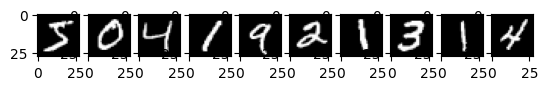

number of training images: 60000
number of test images: 10000


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#x_train.shape-->(60000, 28, 28)
# print out first 10 images in our training data
imgplot = show_images(x_train[0:10])

# check the size of our dataset
print("number of training images:",x_train.shape[0])
print("number of test images:",y_test.shape[0])

In [ ]:
# update all the training, testing dataset.
x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize them into range [0, 1]
x_train /= 255
x_test /= 255

# **Model VGG**

In [ ]:
pool_size = 2

# Build the model.
model = keras.Sequential([
  #Block1
  Conv2D(64, 3, input_shape=(28, 28, 1), activation='relu', padding = 'same'),
  Conv2D(64, 3, activation='relu', padding = 'same'),
  MaxPooling2D(pool_size=pool_size, strides=2),

  #Block2
  Conv2D(128, 3, activation='relu', padding = 'same'),
  Conv2D(128, 3, activation='relu', padding = 'same'),
  MaxPooling2D(pool_size=pool_size, strides=2),

  #Block3
  Conv2D(256, 3, activation='relu', padding = 'same'),
  Conv2D(256, 3, activation='relu', padding = 'same'),
  Conv2D(256, 3, activation='relu', padding = 'same'),
  MaxPooling2D(pool_size=pool_size, strides=2),

  #Block4
  Conv2D(512, 3, activation='relu', padding = 'same'),
  Conv2D(512, 3, activation='relu', padding = 'same'),
  Conv2D(512, 3, activation='relu', padding = 'same'),
  MaxPooling2D(pool_size=pool_size, strides=2),

  #Block5
  #Conv2D(512, 3, activation='relu', padding = 'same'),
  #Conv2D(512, 3, activation='relu', padding = 'same'),
  #Conv2D(512, 3, activation='relu', padding = 'same'),
  #MaxPooling2D(pool_size=pool_size, strides=2),


  #FC Block
  Flatten(),
  Dense(4096, activation='relu'),
  Dense(4096, activation='relu'),
  Dense(10, activation='softmax'),
])
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_238 (Conv2D)         (None, 28, 28, 64)        640       
                                                                 
 conv2d_239 (Conv2D)         (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_91 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_240 (Conv2D)         (None, 14, 14, 128)       73856     
                                                                 
 conv2d_241 (Conv2D)         (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_92 (MaxPooli  (None, 7, 7, 128)         0         
 ng2D)                                               

# **Model Compile**

In [ ]:
model.compile(optimizer = 'SGD',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

batch_size = 250
epochs = 10

# Train the model.
history = model.fit(x_train, y_train,
                    epochs=epochs,
                    validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 46s 22ms/step - loss: 0.2539 - accuracy: 0.9178 - val_loss: 0.0582 - val_accuracy: 0.9831
Epoch 2/10
1500/1500 [==============================] - 34s 23ms/step - loss: 0.0510 - accuracy: 0.9841 - val_loss: 0.0437 - val_accuracy: 0.9877
Epoch 3/10
1500/1500 [==============================] - 34s 23ms/step - loss: 0.0313 - accuracy: 0.9906 - val_loss: 0.0385 - val_accuracy: 0.9886
Epoch 4/10
1500/1500 [==============================] - 34s 23ms/step - loss: 0.0211 - accuracy: 0.9934 - val_loss: 0.0339 - val_accuracy: 0.9894
Epoch 5/10
1500/1500 [==============================] - 33s 22ms/step - loss: 0.0145 - accuracy: 0.9951 - val_loss: 0.0372 - val_accuracy: 0.9905
Epoch 6/10
1500/1500 [==============================] - 34s 23ms/step - loss: 0.0103 - accuracy: 0.9967 - val_loss: 0.0347 - val_accuracy: 0.9902
Epoch 7/10
1500/1500 [==============================] - 33s 22ms/step - loss: 0.0072 - accuracy: 0.9976 - val_loss: 0.0319 -

# **Model Evaluation**

In [ ]:
loss_ , acc = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss_)
print('Test accuracy:', acc)

Test loss: 0.033857863396406174
Test accuracy: 0.9918000102043152


# **Model Prediction**

In [ ]:
prediction = model.predict(x_test)
classes_x=np.argmax(prediction,axis=1)#این دستور خروجی پیش بینی شده را که به صورت یک آرایه هست را به یک عدد تبدیل می کند
print('Test prediction:', classes_x)

313/313 [==============================] - 2s 6ms/step
Test prediction: [7 2 1 ... 4 5 6]


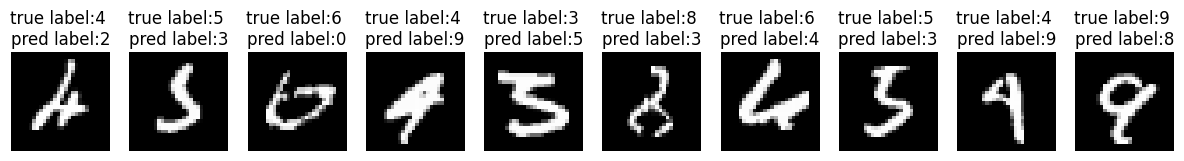

In [ ]:
(_, _), (x_test_image, y_test_label) = mnist.load_data()


b=0
f,axs = plt.subplots(1,10, figsize=(15, 15))

for t in range (len(y_test)):
  if b>=10:
    break
  if (classes_x[t] !=  y_test_label[t]):
    axs[b].imshow(x_test_image[t], cmap='gray')
    axs[b].set_title(f'true label:{y_test_label[t]} \n' f'pred label:{classes_x[t]}')
    axs[b].axis('off')

    b+=1


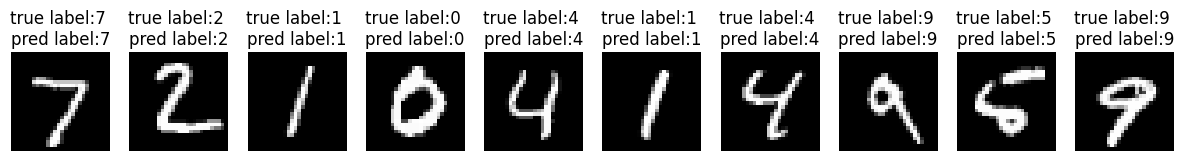

In [ ]:
b=0
f,axs = plt.subplots(1,10, figsize=(15, 15))

for t in range (len(y_test_label)):
  if b>=10:
    break
  if (classes_x[t] ==  y_test_label[t]):
    axs[b].imshow(x_test_image[t], cmap='gray')
    axs[b].set_title(f'true label:{y_test_label[t]} \n' f'pred label:{classes_x[t]}')
    axs[b].axis('off')

    b+=1


In [ ]:
def show_train_history(train_history):
    fig=plt.gcf()
    fig.set_size_inches(8, 4)
    plt.subplot(121)
    print(train_history.history.keys())

    if "accuracy" in train_history.history.keys():
        plt.plot(train_history.history["accuracy"])

    if "val_accuracy" in train_history.history.keys():
        plt.plot(train_history.history["val_accuracy"])

    plt.title("Train History")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["train", "validation"], loc="upper left", fontsize="8")
    plt.subplot(122)

    if "loss" in train_history.history.keys():
        plt.plot(train_history.history["loss"])

    if "val_loss" in train_history.history.keys():
        plt.plot(train_history.history["val_loss"])

    plt.title("Train History")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["train", "validation"], loc="upper right", fontsize="8")
    plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


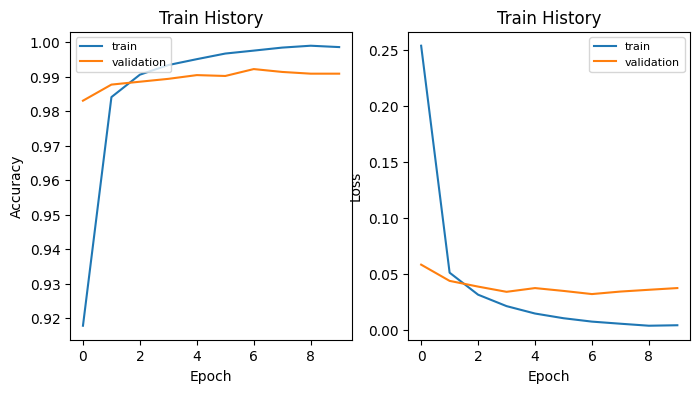

In [ ]:
#show train history
show_train_history(history)

In [ ]:
def plot_confusion_matrix(labels, pred_labels):

    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(1, 1, 1)
    cm = metrics.confusion_matrix(labels, pred_labels)
    cm = metrics.ConfusionMatrixDisplay(cm, display_labels=range(10))
    cm.plot(values_format='d', cmap='Blues', ax=ax)

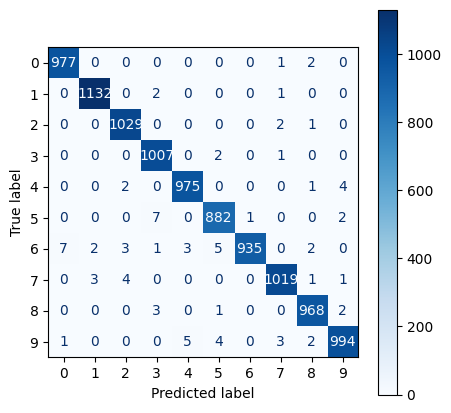

In [ ]:
plot_confusion_matrix(y_test_label,classes_x)